In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

In [2]:
image = cv2.imread('sar_1_gray.jpg')

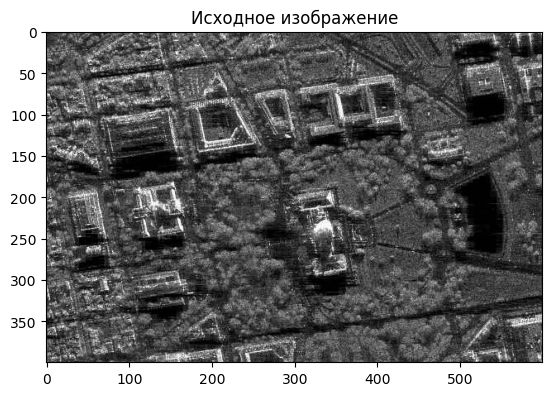

In [3]:
plt.imshow(image)
plt.title("Исходное изображение")
plt.show()

In [4]:
b,g,r = cv2.split(image)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

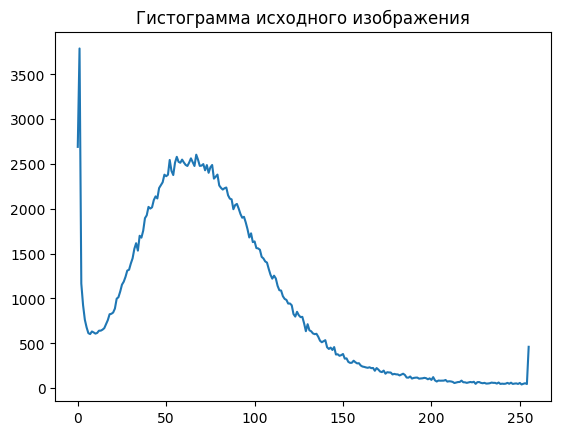

In [6]:
plt.plot(b_hist)
plt.title("Гистограмма исходного изображения")
plt.show()

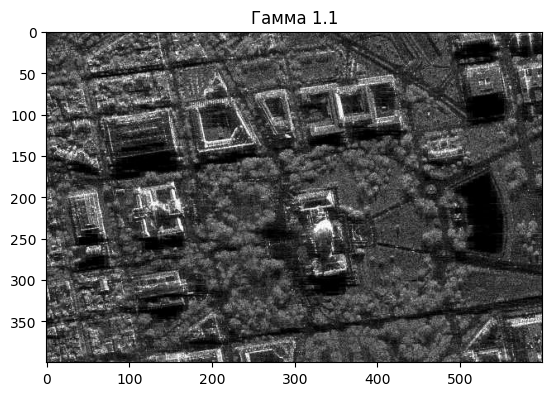

In [12]:
corrected_image = np.uint8(np.power(image_gray/255, 1.1) * 255)
plt.imshow(corrected_image, cmap = "gray")
plt.title("Гамма 1.1")
plt.show()

In [13]:
ssim = structural_similarity(image_gray, corrected_image, multichannel = False)

In [14]:
mse = mean_squared_error(image_gray, corrected_image)

In [15]:
print(f'MSE: {mse}, SSIM: {ssim}')

MSE: 64.54242916666666, SSIM: 0.9869210487665898


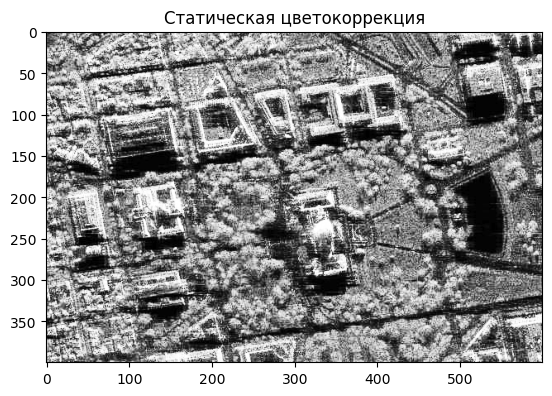

In [17]:
eq_gray = cv2.equalizeHist(image_gray)
plt.imshow(eq_gray, cmap="gray")
plt.title("Статическая цветокоррекция")
plt.show()

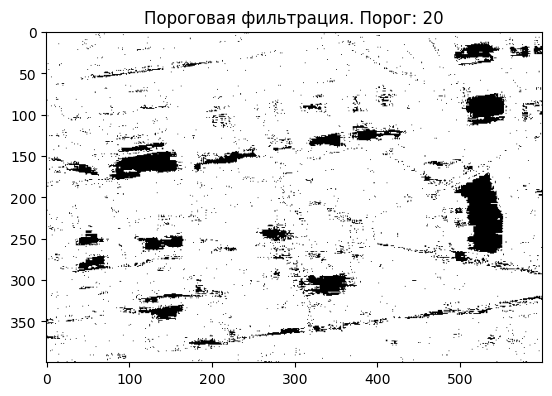

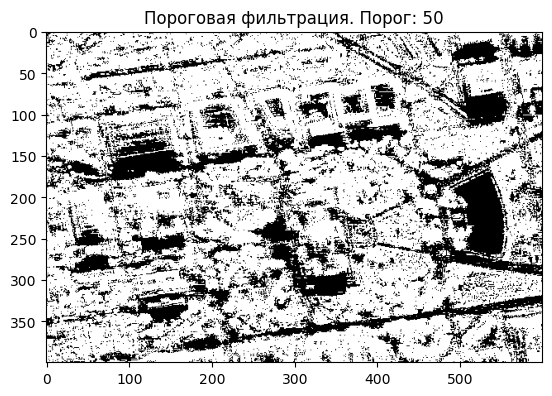

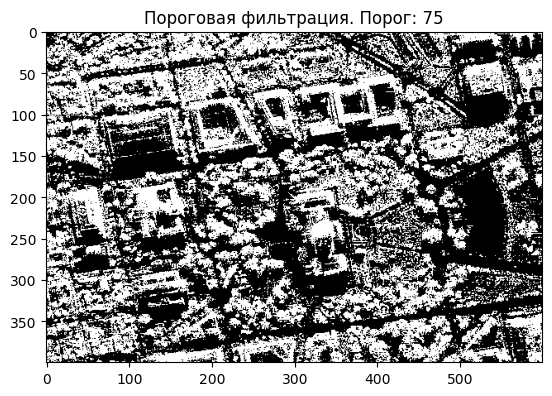

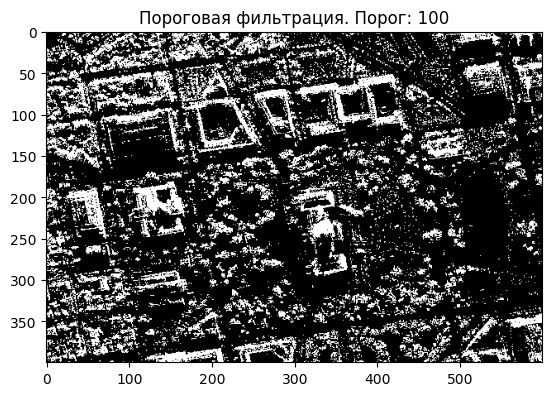

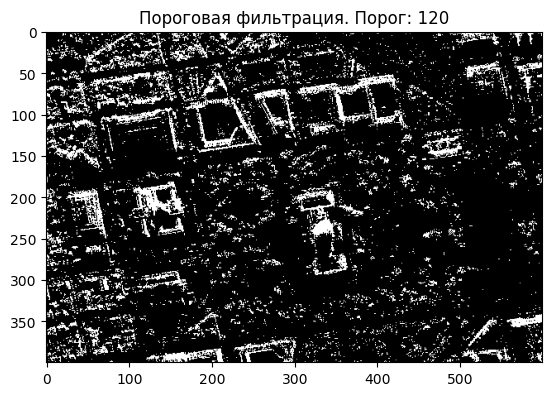

In [18]:
thresholds = [20, 50, 75, 100, 120]
for threshold in thresholds:
    _, image_threshold = cv2.threshold(image_gray, threshold, 255, cv2.THRESH_BINARY)
    plt.imshow(image_threshold, cmap = "gray")
    plt.title(f'Пороговая фильтрация. Порог: {threshold}')
    plt.show()